# TELECOM CHURN CASE STUDY

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Steps included are:
* Step 1: Importing, reading and understanding the data
* Step 2: Data cleaning
* Step 3: Performing EDA
* Step 4: Modelling : PCA
* Step 5: Feature importance
* Conclusion

## Step 1: Importing, reading and understanding the data

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier

!pip install xgboost
import xgboost as xgb

!pip3 install imblearn
from imblearn.over_sampling import SMOTE

# Getting rid of any warning messages

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data set

telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Understand a sample of the dataset

telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


We have 5 rows & 226 columns in the dataset

In [4]:
# Data exploration
# Statistical information of the dataset

telecom.describe(include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


In [5]:
# Shape of the dataset (number of rows and columns)

telecom.shape

(99999, 226)

In [6]:
# To understand the columns in the dataset

telecom.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

Insights from the above output:  
* Number of columns or attributes:  226  
* Number of floating datatype variables: 179  
* Number of integer datatype variables: 35  
* Number of categorical datatype variables: 12

In [7]:
# Stripping off the white spaces

telecom = telecom.rename (columns = lambda x: x.strip(), inplace = False)

In [8]:
# Check and drop any duplicated records

telecom = telecom.drop_duplicates()

In [9]:
# Filtering unique ID data. We have a total of 2 ID columns

id_cols = ["mobile_number","circle_id"]  
print (f"Total number of ID columns: {len(id_cols)}")

Total number of ID columns: 2


In [10]:
# Filtering categorical variables

date_cols = [col for col in telecom.columns if telecom[col].dtype =="object"]    
print (f"Total number of categorical columns: {len(date_cols)}")

Total number of categorical columns: 12


In [11]:
# Filtering numeric variables

num_cols = [ col for col in telecom.columns if col not in date_cols + id_cols]    
print(f"Total number of numeric columns: {len(num_cols)}")  

Total number of numeric columns: 212


In [12]:
# Let's check the date columns 

telecom[date_cols].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


## Step 2: Data cleaning

In [13]:
# Viewing the null values

telecom.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [14]:
# Check and drop variables with highest percentage of null values
# Rate of proportion/percent of null values in each variable

df_missing = pd.DataFrame((round (100* (telecom.isnull().sum() / len(telecom.index)), 2)), columns = ['Missing'])
df_missing.sort_values(by = ['Missing'], ascending = False).head(50)

,Missing
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


There are multiple columns with null values however, these columns cannot be dropped as they do have some information which cannot be removed. Hence, we will replace the 'NaN' values with a 0's (zero) for a few columns

In [15]:
# Replacing 0 in place of 'NaN' for the following columns

impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']
telecom[impute_zero] = telecom[impute_zero].apply(lambda x: x.fillna(0))

The columns to  which we have assigned 0's are (for the months 6, 7, 8 and 9): 
* Maximum recharge data
* Total recharge data
* Average recharge amount data

In [16]:
# Dropping variables

telecom.drop (columns = id_cols, inplace = True)
telecom.drop (columns = date_cols, inplace = True)

In [17]:
# Overview of the columns associated with the 6th month (June)

col_6month = [col for col in telecom.columns if "_6" in col]
print(len(col_6month))
telecom[col_6month].head(10)

51


,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,...,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0
1,34.047,24.11,15.74,0.00,0.00,23.88,11.51,0.00,0.00,35.39,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
2,167.690,11.54,143.33,0.00,0.00,7.19,29.34,24.11,0.00,60.66,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
3,221.338,99.91,123.31,0.00,0.00,73.68,107.43,1.91,0.00,183.03,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
4,261.636,50.31,76.96,0.00,0.00,50.31,67.64,0.00,0.00,117.96,...,0.00,0.00,0.00,0.00,0.0,0,1,0,0,0.0
5,50.258,50.16,19.28,0.00,0.00,50.16,16.39,0.00,0.00,66.56,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
6,429.023,71.03,262.73,0.00,0.00,71.03,252.23,10.38,0.11,333.64,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.00,422.16,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
8,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.00,378.09,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN
9,119.518,33.89,63.48,0.00,0.00,33.89,38.03,0.00,0.00,71.93,...,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN


Similarly we have the same data for the remaining 3 months - 7 (July), 8 (August) and 9 (September)

In [18]:
# Check the null values for the following categorical variables

cat_cols = ["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]
telecom[cat_cols].isna().sum()/len(telecom)

night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
dtype: float64

In [19]:
# Replacing these null values 'NaN' with -1 and rechecking the same

telecom[cat_cols] = telecom[cat_cols].fillna(-1)
telecom[cat_cols].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [20]:
# Dropping columns which have null values more than 50%

def drop_cols(cols):
    '''cols: list of columns in dataframe
      '''
    for col in cols:
        if (telecom[col].isna().sum()/len(telecom)) > .50:  
            telecom.drop(columns = [col], inplace = True)
            
drop_cols(telecom.columns)

In [21]:
# To understand the dataset

telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 196 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(163), int64(33)
memory usage: 150.3 MB


Insights from the above output:

* Number of columns or attributes: 196
* Number of floating datatype variables: 163
* Number of integer datatype variables: 33

In [22]:
# Checking columns which have only 1 value 

col_0_variance = pd.DataFrame(telecom.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(col_0_variance[col_0_variance['nunique'] == 1])

              feature  nunique
0      loc_og_t2o_mou        1
1      std_og_t2o_mou        1
2      loc_ic_t2o_mou        1
55   std_og_t2c_mou_6        1
56   std_og_t2c_mou_7        1
57   std_og_t2c_mou_8        1
58   std_og_t2c_mou_9        1
107  std_ic_t2o_mou_6        1
108  std_ic_t2o_mou_7        1
109  std_ic_t2o_mou_8        1
110  std_ic_t2o_mou_9        1


In [23]:
# Drop these columns as they do not contribute any variance in the dataset
# Create a list of these columns

drop_cols = list(col_0_variance[col_0_variance['nunique'] == 1]["feature"])
drop_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [24]:
# Dropping the above columns

telecom.drop(columns = drop_cols, inplace = True)

In [25]:
# Let's check the shape of the dataset now

telecom.shape

(99999, 185)

The number of columns has come down to 185 from 226

In [26]:
# Filling 0s on to the remaining null value columns

telecom = telecom.fillna(0)

In [27]:
# Final check with null values

telecom.isna().sum()

arpu_6         0
arpu_7         0
arpu_8         0
arpu_9         0
onnet_mou_6    0
              ..
aon            0
aug_vbc_3g     0
jul_vbc_3g     0
jun_vbc_3g     0
sep_vbc_3g     0
Length: 185, dtype: int64

### Filtering High Value Customers

* Customers are high value customers if their average recharge amount for June and July is more than or equal to the 70th percentile of the average recharge amount.

In [28]:
# Create/derive new variables to filter out high value customers
# Deriving the total data recharge amount for June and July.

telecom["data_recharge_amnt_6_total"] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom["data_recharge_amnt_7_total"] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [29]:
# Deriving the total recharge amount for June and July.

telecom["recharge_amnt_6_total"] = telecom.total_rech_amt_6 + telecom.data_recharge_amnt_6_total
telecom["recharge_amnt_7_total"] = telecom.total_rech_amt_7 + telecom.data_recharge_amnt_7_total

In [30]:
# Deriving the average amount of recharge for June and July

telecom['average_amnt_6and7'] = (telecom["recharge_amnt_6_total"] + telecom["recharge_amnt_7_total"])/2

In [31]:
# 70th percentile of "average_amnt_6_7"

telecom['average_amnt_6and7'].quantile(.70)

478.0

In [32]:
# Filtering high value customers based on the 70th percentile

telecom_highvaluecust = telecom[telecom["average_amnt_6and7"]>= telecom["average_amnt_6and7"].quantile(.70)]

In [33]:
# Shape of the dataset now (number of rows and columns)

telecom_highvaluecust.shape 

(30001, 190)

Removing the derived columns as we have filtered the high value customer's data

In [34]:
# Dropping the newly derived columns

telecom_highvaluecust.drop(columns = ["data_recharge_amnt_6_total","data_recharge_amnt_7_total","recharge_amnt_6_total",\
                                "recharge_amnt_7_total","average_amnt_6and7"], inplace = True)

In [35]:
# Final shape of the dataset (number of rows and columns)

telecom_highvaluecust.shape 

(30001, 185)

Insights from the above output:
* Number of rows: 30001
* Number of columns: 185

#### Implementing the target variable: churn

We have multiple customer behavior variables to understand if a user will churn or not. Below are the attributes which helps in understanding the churn behavior:
* vol_2g_mb_9
* vol_3g_mb_9
* total_ic_mou_9
* total_og_mou_9

In [36]:
# Consumption of data in total (2G and 3G)

telecom_highvaluecust["total_data_consumptions"] = telecom_highvaluecust.vol_2g_mb_9 + telecom_highvaluecust.vol_3g_mb_9

In [37]:
# Total number of incoming and outgoing calls

telecom_highvaluecust['total_calls_9'] = telecom_highvaluecust.total_ic_mou_9 + telecom_highvaluecust.total_og_mou_9

In [38]:
# Creating a churn variable

telecom_highvaluecust["churn"] = telecom_highvaluecust.apply(lambda row:1 if (row.total_calls_9 == 0 and row.total_data_consumptions == 0) else 0, axis = 1)

Here, we will mark each churned customer as 1 and non-churned customer as 0.  
A churn customer is one who has not consumed any internet data or made any calls (incoming or outgoing) on the 9th month (September)

In [39]:
# Percentage of churned and non-churned customers

print((round(100*telecom_highvaluecust["churn"].value_counts(normalize=True))))

0    92.0
1     8.0
Name: churn, dtype: float64


Since the data seems imbalanced, we can drop the derived variable

In [40]:
# Drop the derived variable 

telecom_highvaluecust.drop(columns = ["total_calls_9","total_data_consumptions"], inplace = True)

In [41]:
# Columns corresponding to the 9th month (September) can be dropped

telecom_highvaluecust = telecom_highvaluecust.filter(regex = '[^9]$', axis = 1)

Since the ninth month (September) is the ‘churn’ phase, the users of these columns have already churned.  
This data will not help us in churn prediction. Hence, we can eliminate the attributes which belong to this phase.  

In [42]:
# Final high value customer data set

telecom_highvaluecust.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 141 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   

Insights from the above output:

* Number of columns or attributes: 141 
* Number of floating datatype variables: 115
* Number of integer datatype variables: 26
* Number of rows: 30001 

## Step 3: Performing EDA

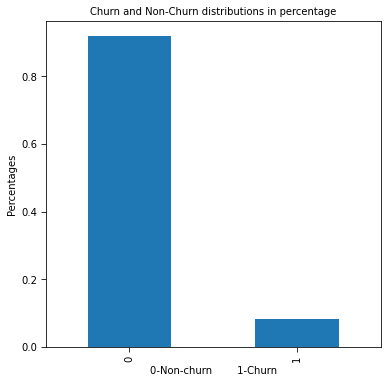

In [43]:
# Bar plot to validate churn and non-churn in percentages

plt.figure(figsize = (6,6))
telecom_highvaluecust["churn"].value_counts(normalize = True).plot.bar()
plt.tick_params(size = 5, labelsize = 10) 
plt.title("Churn and Non-Churn distributions in percentage", fontsize = 10)
plt.ylabel("Percentages", fontsize = 10)
plt.xlabel("0-Non-churn        1-Churn", fontsize = 10)
plt.show()

In [44]:
# Derive new features to be able to visualize the data. Comparing data between June & July with August 

# Arpu: Average Revenue Per User
telecom_highvaluecust['arpu_diff'] = telecom_highvaluecust.arpu_8 - ((telecom_highvaluecust.arpu_6 + telecom_highvaluecust.arpu_7)/2)

# Onnet: All kind of calls within the same operator network
telecom_highvaluecust['onnet_mou_diff'] = telecom_highvaluecust.onnet_mou_8 - ((telecom_highvaluecust.onnet_mou_6 + telecom_highvaluecust.onnet_mou_7)/2)

# Offnet: All kind of calls outside the operator T network
telecom_highvaluecust['offnet_mou_diff'] = telecom_highvaluecust.offnet_mou_8 - ((telecom_highvaluecust.offnet_mou_6 + telecom_highvaluecust.offnet_mou_7)/2)

# Roam-incoming: Indicates that customer is in roaming zone during the call
telecom_highvaluecust['roam_ic_mou_diff'] = telecom_highvaluecust.roam_ic_mou_8 - ((telecom_highvaluecust.roam_ic_mou_6 + telecom_highvaluecust.roam_ic_mou_7)/2)

# Roam-outgoing : Indicates that customer is in roaming zone during the call
telecom_highvaluecust['roam_og_mou_diff'] = telecom_highvaluecust.roam_og_mou_8 - ((telecom_highvaluecust.roam_og_mou_6 + telecom_highvaluecust.roam_og_mou_7)/2)

# Loc-outgoing: Local calls - within same telecom circle
telecom_highvaluecust['loc_og_mou_diff'] = telecom_highvaluecust.loc_og_mou_8 - ((telecom_highvaluecust.loc_og_mou_6 + telecom_highvaluecust.loc_og_mou_7)/2)

# Std-outgoing: STD calls - outside the calling circle
telecom_highvaluecust['std_og_mou_diff'] = telecom_highvaluecust.std_og_mou_8 - ((telecom_highvaluecust.std_og_mou_6 + telecom_highvaluecust.std_og_mou_7)/2)

# ISD-outgoing: ISD calls
telecom_highvaluecust['isd_og_mou_diff'] = telecom_highvaluecust.isd_og_mou_8 - ((telecom_highvaluecust.isd_og_mou_6 + telecom_highvaluecust.isd_og_mou_7)/2)

# SPL-outgoing: Special calls
telecom_highvaluecust['spl_og_mou_diff'] = telecom_highvaluecust.spl_og_mou_8 - ((telecom_highvaluecust.spl_og_mou_6 + telecom_highvaluecust.spl_og_mou_7)/2)

# Total-outgoing: Total outgoing number of calls
telecom_highvaluecust['total_og_mou_diff'] = telecom_highvaluecust.total_og_mou_8 - ((telecom_highvaluecust.total_og_mou_6 + telecom_highvaluecust.total_og_mou_7)/2)

# Loc-incoming: Local calls - within same telecom circle
telecom_highvaluecust['loc_ic_mou_diff'] = telecom_highvaluecust.loc_ic_mou_8 - ((telecom_highvaluecust.loc_ic_mou_6 + telecom_highvaluecust.loc_ic_mou_7)/2)

# Std-incoming: STD calls - outside the calling circle
telecom_highvaluecust['std_ic_mou_diff'] = telecom_highvaluecust.std_ic_mou_8 - ((telecom_highvaluecust.std_ic_mou_6 + telecom_highvaluecust.std_ic_mou_7)/2)

# ISD-incoming: ISD calls
telecom_highvaluecust['isd_ic_mou_diff'] = telecom_highvaluecust.isd_ic_mou_8 - ((telecom_highvaluecust.isd_ic_mou_6 + telecom_highvaluecust.isd_ic_mou_7)/2)

# SPL-incoming: Special calls
telecom_highvaluecust['spl_ic_mou_diff'] = telecom_highvaluecust.spl_ic_mou_8 - ((telecom_highvaluecust.spl_ic_mou_6 + telecom_highvaluecust.spl_ic_mou_7)/2)

# Total-incoming: Total number of calls
telecom_highvaluecust['total_ic_mou_diff'] = telecom_highvaluecust.total_ic_mou_8 - ((telecom_highvaluecust.total_ic_mou_6 + telecom_highvaluecust.total_ic_mou_7)/2)

# Total Recharge number
telecom_highvaluecust['total_rech_num_diff'] = telecom_highvaluecust.total_rech_num_8 - ((telecom_highvaluecust.total_rech_num_6 + telecom_highvaluecust.total_rech_num_7)/2)

# Total recharge amount
telecom_highvaluecust['total_rech_amt_diff'] = telecom_highvaluecust.total_rech_amt_8 - ((telecom_highvaluecust.total_rech_amt_6 + telecom_highvaluecust.total_rech_amt_7)/2)

# Maximum recharge amount
telecom_highvaluecust['max_rech_amt_diff'] = telecom_highvaluecust.max_rech_amt_8 - ((telecom_highvaluecust.max_rech_amt_6 + telecom_highvaluecust.max_rech_amt_7)/2)

# Total recharge data
telecom_highvaluecust['total_rech_data_diff'] = telecom_highvaluecust.total_rech_data_8 - ((telecom_highvaluecust.total_rech_data_6 + telecom_highvaluecust.total_rech_data_7)/2)

# Maximum recharge data
telecom_highvaluecust['max_rech_data_diff'] = telecom_highvaluecust.max_rech_data_8 - ((telecom_highvaluecust.max_rech_data_6 + telecom_highvaluecust.max_rech_data_7)/2)

# Average recharge amount in data
telecom_highvaluecust['av_rech_amt_data_diff'] = telecom_highvaluecust.av_rech_amt_data_8 - ((telecom_highvaluecust.av_rech_amt_data_6 + telecom_highvaluecust.av_rech_amt_data_7)/2)

# 2G data consumption 
telecom_highvaluecust['vol_2g_mb_diff'] = telecom_highvaluecust.vol_2g_mb_8 - ((telecom_highvaluecust.vol_2g_mb_6 + telecom_highvaluecust.vol_2g_mb_7)/2)

# 3G data consumption
telecom_highvaluecust['vol_3g_mb_diff'] = telecom_highvaluecust.vol_3g_mb_8 - ((telecom_highvaluecust.vol_3g_mb_6 + telecom_highvaluecust.vol_3g_mb_7)/2)

#### Visualize the data

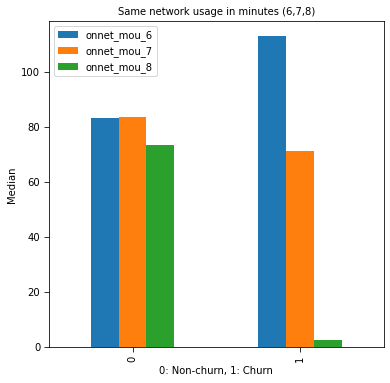

In [45]:
# Bar chart to visualize onnet_mou: All kind of calls within the same operator network

telecom_highvaluecust.groupby("churn")["onnet_mou_6","onnet_mou_7","onnet_mou_8" ].median().plot.bar(figsize = [6,6])
plt.tick_params(size = 5, labelsize = 10) 
plt.title("Same network usage in minutes (6,7,8)", fontsize = 10)
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Considering the churn part of the chart, customers who spent more time in month 6 (June) tend to churn.

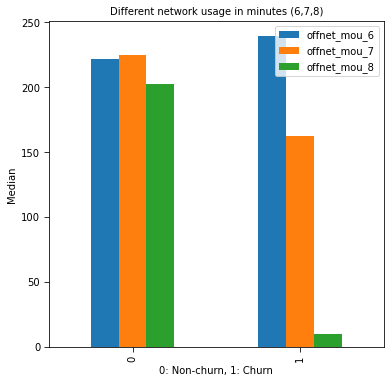

In [46]:
# Bar chart to visualize offnet_mou:  All kind of calls outside the operator T network

telecom_highvaluecust.groupby("churn")["offnet_mou_6","offnet_mou_7","offnet_mou_8" ].median().plot.bar(figsize = [6,6])
plt.tick_params(size = 5, labelsize = 10) 
plt.title("Different network usage in minutes (6,7,8)", fontsize = 10)
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Customers who have a significant variation in call time between month 6 and month 7 are more likely to churn.

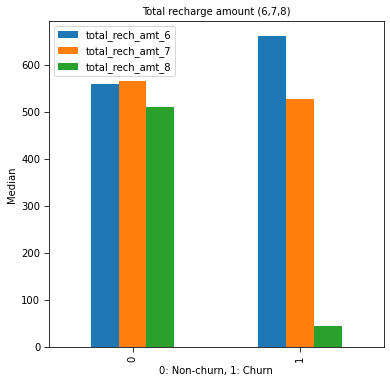

In [47]:
# Bar chart to visualize total_rech_amt: Total recharge amount

telecom_highvaluecust.groupby("churn")["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8" ].median().plot.bar(figsize = [6,6])
plt.tick_params(size = 5, labelsize = 10) 
plt.title("Total recharge amount (6,7,8)",fontsize = 10)
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Users are more likely to churn when the total recharge amount differs significantly.

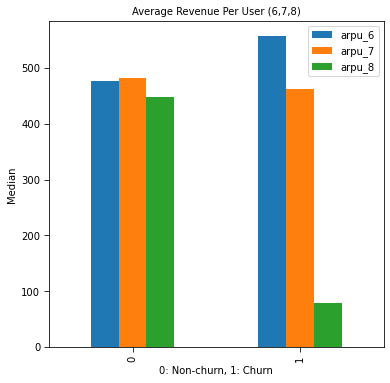

In [48]:
# Bar chart to visualize arpu: Average Revenue Per User

telecom_highvaluecust.groupby("churn")["arpu_6","arpu_7","arpu_8"].median().plot.bar(figsize = [6,6])
plt.title("Average Revenue Per User (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Considering the churn part of the chart, customers who spent more money in month 6 (June) with the operator tend to churn.

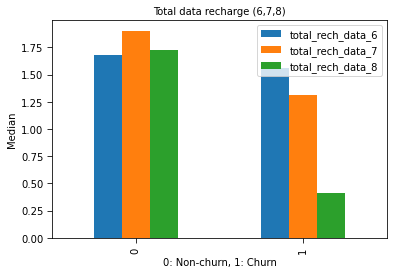

In [49]:
# Bar chart to visualize total_rech_data: Total recharge data

telecom_highvaluecust.groupby("churn")["total_rech_data_6","total_rech_data_7","total_rech_data_8" ].mean().plot.bar()
plt.title("Total data recharge (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Customers that have not recharged in months 6,7 and 8 may or may not churn; we don't have sufficient data to support this.

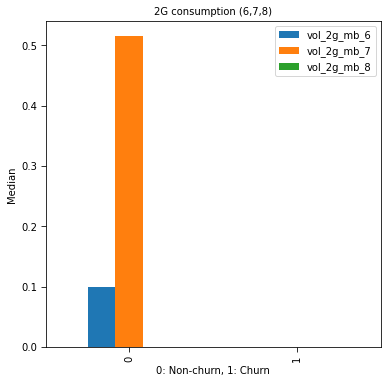

In [50]:
# Bar chart to visualize vol_2g_mb_6: 2G consumption

telecom_highvaluecust.groupby("churn")["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8" ].median().plot.bar(figsize = [6,6])
plt.title("2G consumption (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* There is no substantial proof from statistics that those who have not consumed 2G data/internet would churn.

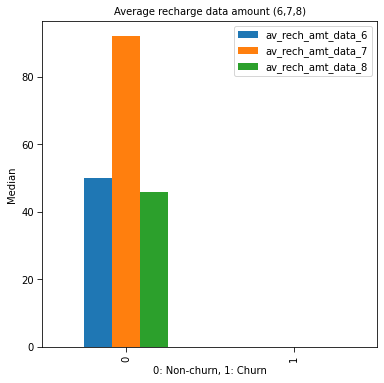

In [51]:
# Bar chart to visualize av_rech_amt_data: Average recharge data amount

telecom_highvaluecust.groupby("churn")["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8" ].median().plot.\
bar(figsize = [6,6])
plt.title("Average recharge data amount (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* According to the dataset, the average recharge for the 6th, 7th and 8th months is zero and you are more likely to churn.

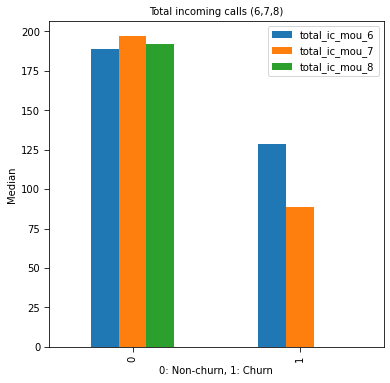

In [52]:
# Bar chart to visualize total_ic : Total incoming calls

telecom_highvaluecust.groupby("churn")["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8"].median().plot.bar(figsize = [6,6])
plt.title("Total incoming calls (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Users with a larger difference in total call minutes for the months of June, July, and August are more likely to unsubscribe

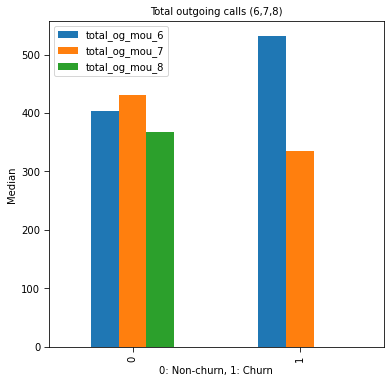

In [53]:
# Bar chart to visualize total_og : Total outgoing calls 

telecom_highvaluecust.groupby("churn")["total_og_mou_6","total_og_mou_7","total_og_mou_8"].median().plot.bar(figsize = [6,6])
plt.title("Total outgoing calls (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* The overall difference in output usage is greater in the 6th and 7th months, and users are more likely to churn.

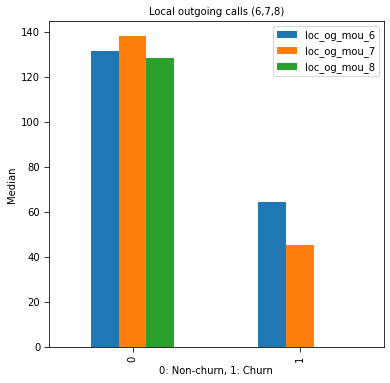

In [54]:
# Bar chart to visualize local_og : Local outgoing calls 

telecom_highvaluecust.groupby("churn")["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"].median().plot.bar(figsize = [6,6])
plt.title("Local outgoing calls (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Users with less number of local calls are more likely to unsubscribe

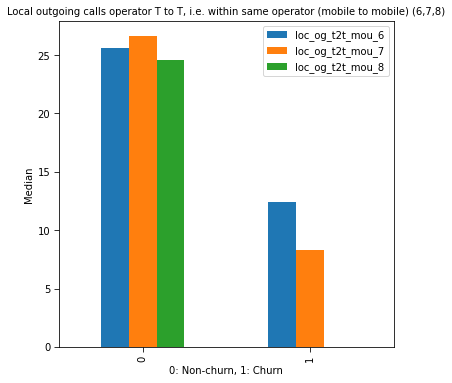

In [55]:
# Bar chart to visualize loc_og_t2t : Local outgoing calls operator T to T, i.e. within same operator (mobile to mobile)

telecom_highvaluecust.groupby("churn")["loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8"].median().plot.bar(figsize = [6,6])
plt.title("Local outgoing calls operator T to T, i.e. within same operator (mobile to mobile) (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Outgoing local calls with the same operator in the 6th, 7th, and 8th months are low, and users are more likely to cancel/churn.

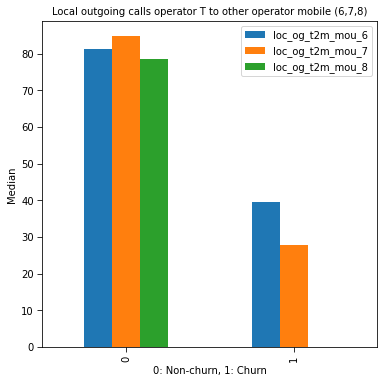

In [56]:
# Bar chart to visualize loc_og_t2m : Local outgoing calls operator T to other operator mobile

telecom_highvaluecust.groupby("churn")["loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8"].median().plot.bar(figsize = [6,6])
plt.title("Local outgoing calls operator T to other operator mobile (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* When the local outbound calls to another operator is low, users are more likely to churn.

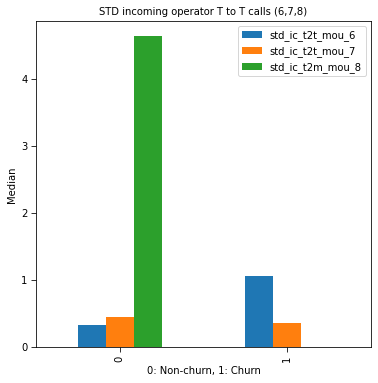

In [57]:
# Bar chart to visualize std_ic_t2t : STD incoming operator T to T calls, i.e. within same operator (mobile to mobile)

telecom_highvaluecust.groupby("churn")["std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2m_mou_8"].median().plot.bar(figsize = [6,6])
plt.title("STD incoming operator T to T calls (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Customers who use more STD calls are more likely to unsubscribe.

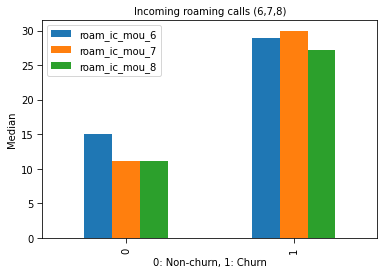

In [58]:
# Bar chart to visualize roam_ic : Incoming roaming calls

telecom_highvaluecust.groupby("churn")["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"].mean().plot.bar()
plt.title("Incoming roaming calls (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Customers who have received more incoming roaming calls are likely to unsubscribe.

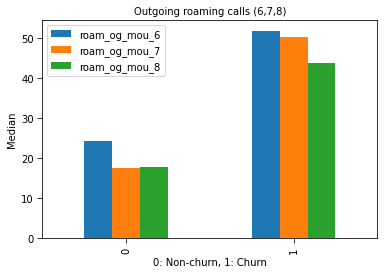

In [59]:
# Bar chart to visualize roam_og : Outgoing roaming calls

telecom_highvaluecust.groupby("churn")["roam_og_mou_6","roam_og_mou_7","roam_og_mou_8"].mean().plot.bar()
plt.title("Outgoing roaming calls (6,7,8)", fontsize = 10)
plt.tick_params(size = 5, labelsize = 10) 
plt.ylabel("Median", fontsize = 10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.show()

**Insight**
* Customers who have made more outgoing roaming calls are likely to churn.

In [60]:
# Check the churn rate for each category of nightpack users in the 8th month (August)

pd.crosstab(telecom_highvaluecust.churn, telecom_highvaluecust.night_pck_user_8, normalize = 'columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [61]:
# Check the churn rate for each category of facebook users in the 8th month (August)

(pd.crosstab(telecom_highvaluecust.churn, telecom_highvaluecust.fb_user_8, normalize = 'columns')*100)

fb_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,93.231707,97.568644
1,14.10877,6.768293,2.431356


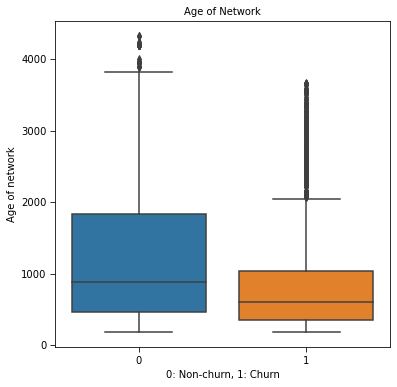

In [62]:
# Box plot to visualize aon : Age on network - number of days the customer is using the operator T network

plt.figure(figsize = [6,6])
sns.boxplot(data = telecom_highvaluecust, x = "churn", y = "aon")
plt.tick_params(size = 5, labelsize = 10) 
plt.title("Age of Network", fontsize=10)
plt.xlabel("0: Non-churn, 1: Churn", fontsize = 10)
plt.ylabel("Age of network", fontsize = 10)
plt.show()

**Insight**
* The median of aon (age of network) is low, there is a high probability of cancellation/churning.

### Splitting the data into train and test data sets

In [63]:
# Train & test split

telecom_train, telecom_test = train_test_split(telecom_highvaluecust, test_size = 0.2, random_state = 48)

In [64]:
# Shape of the test-train split

print(f"Train shape:{telecom_train.shape}")
print(f"Test shape:{telecom_test.shape}")

Train shape:(24000, 164)
Test shape:(6001, 164)


In [65]:
# Transform categorical variables into numeric attributes

cat_cols = ["night_pck_user_6","night_pck_user_7", "night_pck_user_8","fb_user_6", "fb_user_8","fb_user_7"]  

In [66]:
# Reviewing the train set

telecom_train[cat_cols].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_8,fb_user_7
33114,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4101,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
40361,0.0,0.0,0.0,1.0,1.0,1.0
11213,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14484,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [67]:
# Mean of the categorical variables

print(telecom_train.groupby('night_pck_user_6')["churn"].mean())
print(telecom_train.groupby('night_pck_user_7')["churn"].mean())
print(telecom_train.groupby('night_pck_user_8')["churn"].mean())
print(telecom_train.groupby('fb_user_6')["churn"].mean())
print(telecom_train.groupby('fb_user_7')["churn"].mean())
print(telecom_train.groupby('fb_user_8')["churn"].mean())

night_pck_user_6
-1.0    0.099621
 0.0    0.066717
 1.0    0.098462
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.116741
 0.0    0.054784
 1.0    0.058020
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141980
 0.0    0.028647
 1.0    0.019084
Name: churn, dtype: float64
fb_user_6
-1.0    0.099621
 0.0    0.083333
 1.0    0.066233
Name: churn, dtype: float64
fb_user_7
-1.0    0.116741
 0.0    0.065279
 1.0    0.053977
Name: churn, dtype: float64
fb_user_8
-1.0    0.141980
 0.0    0.067373
 1.0    0.023955
Name: churn, dtype: float64


In [68]:
# Categorical variables with the mean value mapping

maps = {'night_pck_user_6' : {-1: 0.099621, 0: 0.066717, 1: 0.098462},
           'night_pck_user_7' : {-1: 0.116741, 0: 0.054784, 1: 0.058020},
           'night_pck_user_8' : {-1: 0.141980, 0: 0.028647, 1: 0.019084},
           'fb_user_6'        : {-1: 0.099621, 0: 0.083333, 1: 0.066233},
           'fb_user_7'        : {-1: 0.116741, 0: 0.065279, 1: 0.053977},
           'fb_user_8'        : {-1: 0.141980, 0: 0.067373, 1: 0.023955}}

In [69]:
# Replace the mapped values with the train data

telecom_train.replace(maps, inplace = True)

In [70]:
# Replace the mapped values with the test data

telecom_test.replace(maps, inplace = True)

In [71]:
# Assigning the variables in train set

y_train = telecom_train.pop("churn")
X_train = telecom_train

In [72]:
# Assigning the variables in test set

y_test = telecom_test.pop("churn")
X_test = telecom_test

In [73]:
# Performing over sampling on the train dataset as it is imbalanced

smt = SMOTE(random_state = 48)
X_train_re_sample, y_train_re_sample = smt.fit_resample(X_train, y_train)

In [74]:
# Shape of the data set now

print(f"Shape of the train data: \n{X_train_re_sample.shape}")
print(f"Shape of the train response variable:\n{y_train_re_sample.value_counts()}")

Shape of the train data: 
(44082, 163)
Shape of the train response variable:
1    22041
0    22041
Name: churn, dtype: int64


Since both the values are equal, we can say that the data is balanced.

In [75]:
# Scaling the train data using MinMax scaler

scaling = MinMaxScaler()
X_train_temp = scaling.fit_transform(X_train_re_sample)

In [76]:
# Create a data frame after scaling the train data

X_train_scaled = pd.DataFrame(X_train_temp, columns = X_train.columns)

In [77]:
# Shape of the scaled train data set

X_train_scaled.shape

(44082, 163)

In [78]:
# Head of the train data set

X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.088949,0.079537,0.035792,0.012317,0.033941,0.010586,0.113348,0.222906,0.043536,0.0,...,0.785335,0.623545,0.605428,0.297260,0.423304,0.36747,0.520098,0.658887,0.370292,0.441836
1,0.091309,0.072997,0.044006,0.068476,0.113913,0.105521,0.029152,0.036250,0.016693,0.0,...,0.785335,0.628061,0.578288,0.322196,0.439305,0.36747,0.520098,0.658887,0.370292,0.441836
2,0.078872,0.071509,0.059257,0.000655,0.005340,0.010668,0.008990,0.069703,0.051038,0.0,...,0.785335,0.638198,0.638831,0.368969,0.455306,0.39759,0.603227,0.750354,0.370801,0.509428
3,0.092193,0.064149,0.038217,0.001225,0.001190,0.004448,0.083064,0.034989,0.040130,0.0,...,0.785335,0.623763,0.594990,0.326563,0.442796,0.36747,0.520098,0.658887,0.370292,0.441836
4,0.091403,0.067002,0.036085,0.018706,0.009548,0.013353,0.046217,0.029105,0.022605,0.0,...,0.785335,0.611482,0.613779,0.325014,0.439450,0.36747,0.520098,0.658887,0.370292,0.441836


In [79]:
# Scaling the test data

X_test_temp = scaling.transform(X_test)

In [80]:
# Create a data frame after scaling the test data

X_test_scaled = pd.DataFrame(X_test_temp, columns = X_test.columns)

In [81]:
# Shape of the scaled test data set

X_test_scaled.shape

(6001, 163)

In [82]:
# Head of the test data set

X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.090964,0.075823,0.042129,0.008711,0.010712,0.026989,0.148318,0.286030,0.107864,0.000000,...,0.777376,0.619594,0.601253,0.315762,0.437850,0.367470,0.520098,0.658887,0.370292,0.441836
1,0.091021,0.069884,0.037593,0.000381,0.001873,0.001295,0.039266,0.039306,0.027770,0.027926,...,0.785335,0.630163,0.601253,0.319096,0.439305,0.367470,0.520098,0.658887,0.370292,0.441836
2,0.092684,0.072383,0.052856,0.021061,0.011957,0.025669,0.041658,0.054902,0.035280,0.000000,...,0.785335,0.633947,0.617954,0.343892,0.457051,0.379518,0.657916,0.706510,0.372878,0.465072
3,0.088568,0.066635,0.040310,0.068338,0.055077,0.016024,0.016731,0.031553,0.036182,0.000000,...,0.785335,0.622551,0.624217,0.329780,0.440032,0.367470,0.520098,0.658887,0.370292,0.441836
4,0.084756,0.055982,0.027394,0.000000,0.000000,0.000000,0.009412,0.002223,0.000000,0.000000,...,0.785335,0.587134,0.590814,0.316866,0.417703,0.289157,0.444353,0.608807,0.305042,0.441836


## Step 4:  Modelling : PCA

**Definition**  
Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation.

In [83]:
# Instantiate an object of the PCA class

pca = PCA(random_state = 60)
pca_X_train = pca.fit(X_train_scaled)

In [84]:
# Checking the variance ratio: explained_variance_ratio_ (this parameter returns a vector of the variance explained by each dimension)

pca_X_train.explained_variance_ratio_

array([6.03828617e-01, 1.40973413e-01, 9.91155206e-02, 3.07631658e-02,
       1.86234669e-02, 1.18416165e-02, 9.48517523e-03, 8.28397598e-03,
       6.72748174e-03, 6.66714826e-03, 6.48765005e-03, 4.03245946e-03,
       3.54239498e-03, 3.02625956e-03, 2.62601134e-03, 2.36736548e-03,
       2.22188138e-03, 2.11335787e-03, 2.04027551e-03, 1.85954948e-03,
       1.80479200e-03, 1.69169327e-03, 1.44245222e-03, 1.39627736e-03,
       1.38652402e-03, 1.32326350e-03, 1.20520271e-03, 1.16539268e-03,
       1.09180753e-03, 9.87446077e-04, 9.32626988e-04, 8.50296303e-04,
       8.22568575e-04, 8.09298469e-04, 7.93824971e-04, 7.32863836e-04,
       7.15982444e-04, 6.64938130e-04, 6.26470521e-04, 6.16430322e-04,
       5.83678714e-04, 5.55821255e-04, 5.11635457e-04, 4.75816882e-04,
       4.69430576e-04, 4.39348363e-04, 4.29142579e-04, 4.02705885e-04,
       3.62016817e-04, 3.53569223e-04, 3.44779423e-04, 3.28864327e-04,
       3.16730775e-04, 3.00533635e-04, 2.84082281e-04, 2.80172818e-04,
      

In [85]:
# Calculate the sum (cumulative) of the variance

cumulative  = np.cumsum(pca_X_train.explained_variance_ratio_)

In [86]:
# Creating a dataframe using the explained variance values

cumulative_df = pd.DataFrame({"Explained variance": cumulative}) 

In [87]:
(round(100*cumulative_df.head(25)))

,Explained variance
0,60.0
1,74.0
2,84.0
3,87.0
4,89.0
5,91.0
6,91.0
7,92.0
8,93.0
9,94.0


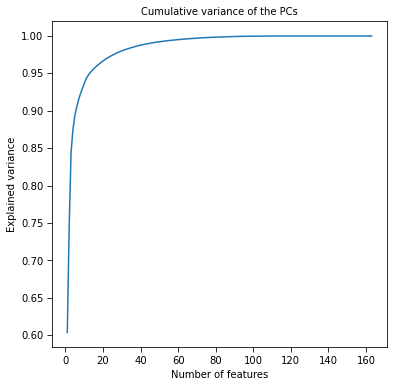

In [88]:
# Scree plot to analyze the explained variance

plt.figure(figsize = [6,6])
plt.plot(range(1, len(cumulative)+1), cumulative)
plt.tick_params(size = 5, labelsize = 10)
plt.title("Cumulative variance of the PCs", size = 10)
plt.ylabel("Explained variance", size = 10)
plt.xlabel("Number of features", size = 10)
plt.show()

From the above plot, we see that the curve is seen between the 95th and 100th region. To be precise, we can consider it to be the 96th mark.

In [89]:
# Understanding the exact number of principal components to consider

pca_check = PCA(0.96, random_state = 40)
pca1_X_train = pca_check.fit_transform (X_train_scaled)
print(f"Number of principal components for variance = 96% is :\t{pca1_X_train.shape[1]}")

Number of principal components for variance = 96% is :	17


In [90]:
# Performing PCA with 17 principal components
# PCA object initiation with 17 components

pca_new = PCA (n_components = 17, random_state = 48)

In [91]:
# PCA on train data

X_train_final = pca_new.fit_transform(X_train_scaled)

In [92]:
# PCA on test data

X_test_final = pca_new.fit_transform(X_test_scaled)

In [93]:
# X_train_final and X_test final shape

print(X_train_final.shape)
print(X_test_final.shape)

(44082, 17)
(6001, 17)


In [94]:
# Correlations

np.corrcoef(X_train_final.transpose())

array([[ 1.00000000e+00, -2.83549482e-17, -2.02898054e-17,
         1.82097174e-17,  1.41398634e-17,  4.40255188e-17,
         2.18627497e-17, -6.14097535e-17,  9.08592762e-17,
        -3.91154813e-17, -4.29573159e-17, -1.46698023e-17,
        -8.94379816e-18, -2.93324803e-17, -7.79108033e-18,
         2.73596910e-18, -2.26189190e-17],
       [-2.83549482e-17,  1.00000000e+00, -7.17362608e-17,
        -5.49601928e-18, -4.84369394e-17, -5.06197756e-18,
        -1.83817305e-17, -1.89128213e-17, -8.39478337e-18,
         1.68653625e-17,  4.44524171e-17, -1.95176251e-17,
         8.09819604e-18, -1.31426998e-17,  4.03112189e-18,
         1.98183490e-17, -4.31550994e-17],
       [-2.02898054e-17, -7.17362608e-17,  1.00000000e+00,
        -4.63503673e-17, -5.71645565e-18, -4.52771678e-18,
         2.52948481e-18, -2.70667019e-18, -5.50642789e-18,
        -7.79408541e-18,  3.56827121e-18,  0.00000000e+00,
         5.00145114e-18,  1.79132467e-17,  1.60251627e-18,
        -8.44125877e-18,  1.0

When we notice the diagonal, we see 1.0000s along the line and the remaining values are almost close to zero.

Let's build different models to analyze the results
* Logistic regression
* Decision tree
* Random forest
* Gradient boosting
* XGboost

In [95]:
# Performance analysis on test data

def performance(model_name, y_test,y_pred, pred_prob):
        
    '''y_test:Test Labels,
       y_pred: Prediction Labels ,
       pred_prob:Predicted Probability  '''
    
    print(f"{model_name}:")
    precision = metrics.precision_score(y_test, y_pred)
    print(f"Precision: {precision}")
    recall = metrics.recall_score(y_test, y_pred)
    print(f"Recall: {recall}")
    f1_score = metrics.f1_score(y_test, y_pred)
    print(f"F1_score: {f1_score}")
    roc_auc = metrics.roc_auc_score(y_test, pred_prob)
    print(f"ROC_AUC: {roc_auc}")
    
#  To return a data frame with the above performance metrics
    return pd.DataFrame({"Model":[model_name], "Precision":[precision], "Recall":[recall], "F1_score":[f1_score], "ROC_AUC":[roc_auc]})   

In [96]:
# Deriving a new variable to store the performance values

perf_df = pd.DataFrame({"Model":[None], "Precision":[None], "Recall":[None], "F1_score":[None], "ROC_AUC":[None]})

### Model 1: Logistic Regression

In [97]:
# Instantiate a Logistic Regression object

logistic_obj = LogisticRegression(random_state = 40)

In [98]:
# Input the PCA data and fit the model

logistic_obj.fit(X_train_final, y_train_re_sample)
cv = cross_val_score(logistic_obj, X_train_final, y_train_re_sample, cv = 5, scoring = 'f1_micro')
print(f"Cross validation score: {cv}")

Cross validation score: [0.82862652 0.84450493 0.84029038 0.83824864 0.83938294]


In [99]:
# Test data prediction

y_pred_logistic = logistic_obj.predict(X_test_final)

In [100]:
# Probability check on test data

pred_prob = logistic_obj.predict_proba(X_test_final)

In [101]:
# Call the performance function to obtain the results

table1 = performance("Logistic Regression", y_test, y_pred_logistic ,pred_prob[:,1])

Logistic Regression:
Precision: 0.09193054136874361
Recall: 0.5601659751037344
F1_score: 0.15794091839719218
ROC_AUC: 0.575711292336771


In [102]:
# Adding the scores to the table for comparison with other ML models

perf_df = perf_df.dropna()
perf_df = perf_df.append(table1)
perf_df

,Model,Precision,Recall,F1_score,ROC_AUC
0,Logistic Regression,0.091931,0.560166,0.157941,0.575711


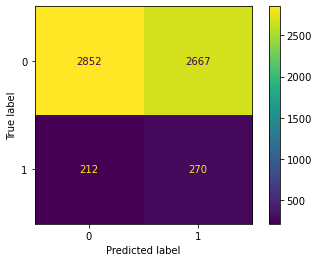

In [103]:
# Logistic regression - confusion matrix

metrics.plot_confusion_matrix(logistic_obj,  X_test_final, y_test)
plt.show()

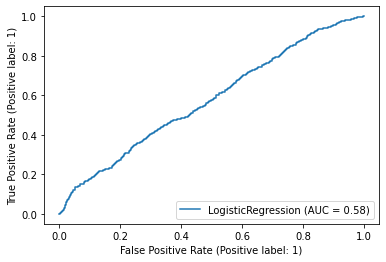

In [104]:
# Logistic regression : ROC_AUC 

metrics.plot_roc_curve(logistic_obj, X_test_final, y_test)
plt.show()

### Model 2: Decision tree

In [105]:
# Instantiate a Decision Tree object

decision_obj = DecisionTreeClassifier(random_state = 40)

In [106]:
# Input the PCA data and fit the model

decision_obj.fit(X_train_scaled, y_train_re_sample)
cv = cross_val_score(decision_obj, X_train_scaled, y_train_re_sample, cv = 5, scoring = 'f1_micro')
print(cv)

[0.88125213 0.92491777 0.92343466 0.93160163 0.93216878]


In [107]:
# Decision tree default parameters

decision_obj.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 40,
 'splitter': 'best'}

In [108]:
# Hyperparameter tuning

param = dict({"max_leaf_nodes":[4,5,6], "min_samples_leaf":[3,4,5], "min_samples_split":[3,4,5]})
dt_classifier = DecisionTreeClassifier(random_state = 40)
dt_classifier_random = RandomizedSearchCV(dt_classifier, param, cv = 5, scoring = "f1_micro")
dt_classifier_random.fit(X_train_scaled, y_train_re_sample)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
                   param_distributions={'max_leaf_nodes': [4, 5, 6],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [3, 4, 5]},
                   scoring='f1_micro')

In [109]:
# Check the score and estimator parameters

print(dt_classifier_random.best_score_)
print(dt_classifier_random.best_estimator_)

0.8546802785906701
DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=3,
                       min_samples_split=4, random_state=40)


In [110]:
# Checking the results

dt_classifier_random.cv_results_

{'mean_fit_time': array([0.91694169, 1.10745859, 0.98459353, 1.09589987, 0.94300542,
        1.12429357, 1.38623819, 1.1009798 , 0.95998902, 1.06077075]),
 'std_fit_time': array([0.02272132, 0.00782061, 0.01547788, 0.01032943, 0.01427173,
        0.04625211, 0.20699793, 0.03367698, 0.08165824, 0.10957739]),
 'mean_score_time': array([0.00945482, 0.00850449, 0.00892735, 0.00853486, 0.00981979,
        0.00842104, 0.01164107, 0.00856142, 0.00879269, 0.00835133]),
 'std_score_time': array([0.00142477, 0.0004132 , 0.00163929, 0.00063385, 0.00185559,
        0.0007769 , 0.00130362, 0.00107678, 0.00041521, 0.001422  ]),
 'param_min_samples_split': masked_array(data=[4, 4, 3, 3, 5, 5, 3, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[4, 3, 3, 3, 5, 5, 5, 5, 3, 3],
              mask=[False, False, False, False, False, False

In [111]:
# Using the best parameters, train the decision tree. Fit the model

dt_classifier = DecisionTreeClassifier(max_leaf_nodes = 5, min_samples_leaf = 3, min_samples_split = 5, random_state = 40)
dt_classifier.fit(X_train_scaled, y_train_re_sample)

DecisionTreeClassifier(max_leaf_nodes=5, min_samples_leaf=3,
                       min_samples_split=5, random_state=40)

In [112]:
# Prediction

y_pred_dt = dt_classifier.predict(X_test_scaled)

In [113]:
# Prediction probability 

pred_prob = dt_classifier.predict_proba(X_test_scaled)

In [114]:
# Validate the scores

table2 = performance("Decision Tree", y_test, y_pred_dt, pred_prob[:,1])

Decision Tree:
Precision: 0.33690360272638753
Recall: 0.7178423236514523
F1_score: 0.45858184227965537
ROC_AUC: 0.8418368382629904


In [115]:
# Append the values to the original table for comparison 

perf_df = perf_df.append(table2)
perf_df.dropna(inplace = True)
perf_df.drop_duplicates(inplace = True)
perf_df

,Model,Precision,Recall,F1_score,ROC_AUC
0,Logistic Regression,0.091931,0.560166,0.157941,0.575711
0,Decision Tree,0.336904,0.717842,0.458582,0.841837


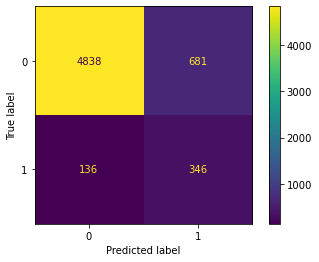

In [116]:
# Decision tree : confusion matrix

metrics.plot_confusion_matrix(dt_classifier, X_test_scaled, y_test)
plt.show()

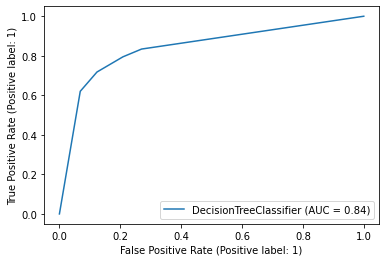

In [117]:
# Decision tree : ROC_AUC

metrics.plot_roc_curve(dt_classifier, X_test_scaled, y_test)
plt.show()

### Model 3 : Random forest

In [118]:
# Instantiate a Random Forest object

rf_obj = RandomForestClassifier(n_jobs = -1) 

In [119]:
# Fit the model

rf_obj.fit(X_train_scaled, y_train_re_sample)

RandomForestClassifier(n_jobs=-1)

In [120]:
# Predict the model

y_pred_rf = rf_obj.predict(X_test_scaled)
pred_prob = rf_obj.predict_proba(X_test_scaled)

In [121]:
# Check random forest parameters

rf_obj.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [122]:
# Hyperparamater tuning

param = dict({"n_estimators":[90,110], "min_samples_split":[2,3], "min_samples_leaf":[2,3]})
rf_obj = RandomForestClassifier(random_state = 40, n_jobs = -1)
rf_classifier_random = RandomizedSearchCV(rf_obj, param, cv = 5, scoring = "f1_micro")
rf_obj.fit(X_train_scaled,y_train_re_sample)

RandomForestClassifier(n_jobs=-1, random_state=40)

In [123]:
# Fit the model

rf_obj = RandomForestClassifier(min_samples_leaf = 3, n_estimators = 120, n_jobs = -1, random_state = 40)
rf_obj.fit(X_train_scaled, y_train_re_sample)

RandomForestClassifier(min_samples_leaf=3, n_estimators=120, n_jobs=-1,
                       random_state=40)

In [124]:
# Prediction

y_pred_rf = rf_obj.predict(X_test_scaled)

In [125]:
# Prediction probability 

pred_prob = rf_obj.predict_proba(X_test_scaled)

In [126]:
# Validate the scores

table3 = performance("Random Forest", y_test, y_pred_rf, pred_prob[:,1])

Random Forest:
Precision: 0.5862708719851577
Recall: 0.6556016597510373
F1_score: 0.6190009794319296
ROC_AUC: 0.9244024227132372


In [127]:
# Append the values to the original table for comparison 

perf_df = perf_df.append(table3)
perf_df

,Model,Precision,Recall,F1_score,ROC_AUC
0,Logistic Regression,0.091931,0.560166,0.157941,0.575711
0,Decision Tree,0.336904,0.717842,0.458582,0.841837
0,Random Forest,0.586271,0.655602,0.619001,0.924402


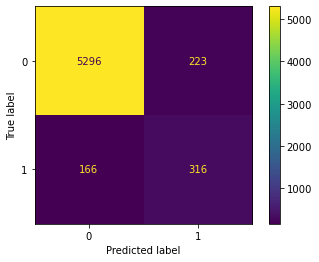

In [128]:
# Random forest : confusion matrix

metrics.plot_confusion_matrix(rf_obj, X_test_scaled, y_test)
plt.show()

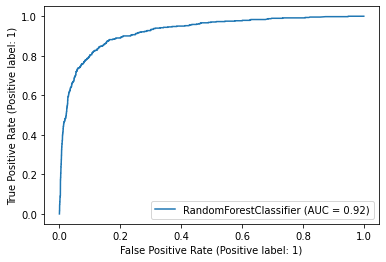

In [129]:
# Random forest : ROC_AUC

metrics.plot_roc_curve(rf_obj, X_test_scaled, y_test)
plt.show()

### Model 4: Gradient boosting

In [130]:
# Instantiate gradient boost object

gb_obj = GradientBoostingClassifier(random_state = 42, min_samples_leaf = 4, min_samples_split = 5)

In [131]:
# Fit the model

gb_obj.fit(X_train_scaled, y_train_re_sample)

GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=5,
                           random_state=42)

In [132]:
# Prediction 

y_pred_gb = gb_obj.predict(X_test_scaled)

In [133]:
# Prediction probability 

pred_prob = gb_obj.predict_proba(X_test_scaled)

In [134]:
# Gradient boosting default parameters

gb_obj.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [135]:
# Hyperparamater tuning

param = dict({"n_estimators":[90,110], "min_samples_split":[2,4], "min_samples_leaf":[2,3], "learning_rate":[.2,.3]})
gb_obj_classifier = GradientBoostingClassifier(random_state = 40)
gb_obj_random = RandomizedSearchCV(gb_obj_classifier, param, cv = 5, scoring = "f1_micro")

In [136]:
# Commenting the below code to cut the code execution time

In [137]:
# Fit the model

# gb_obj_random.fit(X_train_scaled, y_train_re_sample)

In [138]:
# Check the score and estimator parameters

# print(gb_obj_random.best_score_)
# print(gb_obj_random.best_estimator_)

In [139]:
# Validate the scores

table4 = performance("Gradient Boosting", y_test, y_pred_gb, pred_prob[:,1])

Gradient Boosting:
Precision: 0.48326055312954874
Recall: 0.6887966804979253
F1_score: 0.5680068434559453
ROC_AUC: 0.9197948016621568


In [140]:
# Append the values to the original table for comparison 

perf_df = perf_df.append(table4)
perf_df

,Model,Precision,Recall,F1_score,ROC_AUC
0,Logistic Regression,0.091931,0.560166,0.157941,0.575711
0,Decision Tree,0.336904,0.717842,0.458582,0.841837
0,Random Forest,0.586271,0.655602,0.619001,0.924402
0,Gradient Boosting,0.483261,0.688797,0.568007,0.919795


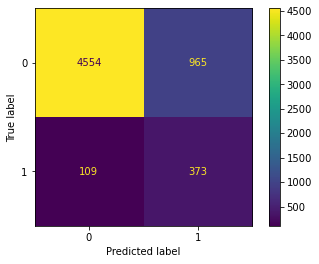

In [141]:
# Gradient boosting : confusion matrix

metrics.plot_confusion_matrix(gb_obj, X_test, y_test)
plt.show()

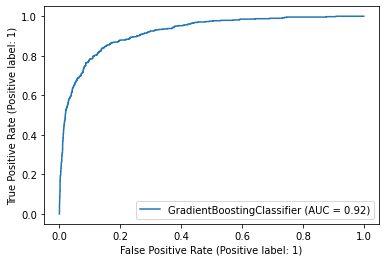

In [142]:
# Gradient boosting : ROC_AUC

metrics.plot_roc_curve(gb_obj, X_test_scaled, y_test)
plt.show()

### Model 5 : XGBoost

In [143]:
# Instantiate XGBoost object

xgb_obj = xgb.XGBClassifier(max_depth = 10)

In [144]:
# Fit the model

xgb_obj.fit(X_train_scaled, y_train_re_sample)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [145]:
# Prediction

y_pred_xgb = xgb_obj.predict(X_test_scaled)

In [146]:
# Prediction probability 

pred_prob = xgb_obj.predict_proba(X_test_scaled)

In [147]:
# XGBoost default parameters

xgb_obj.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 10,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [148]:
# Hyperparamater tuning

param = dict({"n_estimators":[90,110], "subsample":[0,1], "max_depth": [5,7,10], "learning_rate":[.2,.4]})
xgb_obj_classifier = GradientBoostingClassifier(random_state = 40)
xgb_obj_random = RandomizedSearchCV(xgb_obj_classifier, param, cv = 5, scoring = "f1_micro")

In [149]:
# Commenting the below code to cut the code execution time

In [150]:
# Fit the model

# xgb_obj_random.fit(X_train_scaled, y_train_re_sample)

In [151]:
# Check the score and estimator parameters

# print(xgb_clf_rcv.best_score_)
# print(xgb_clf_rcv.best_estimator_)

In [152]:
# Validate the scores

table5 = performance("XGBoost", y_test, y_pred_xgb, pred_prob[:,1])

XGBoost:
Precision: 0.655011655011655
Recall: 0.58298755186722
F1_score: 0.6169045005488474
ROC_AUC: 0.9301635466765507


In [153]:
# Append the values to the original table for comparison 

perf_df = perf_df.append(table5)
perf_df.drop_duplicates()

,Model,Precision,Recall,F1_score,ROC_AUC
0,Logistic Regression,0.091931,0.560166,0.157941,0.575711
0,Decision Tree,0.336904,0.717842,0.458582,0.841837
0,Random Forest,0.586271,0.655602,0.619001,0.924402
0,Gradient Boosting,0.483261,0.688797,0.568007,0.919795
0,XGBoost,0.655012,0.582988,0.616905,0.930164


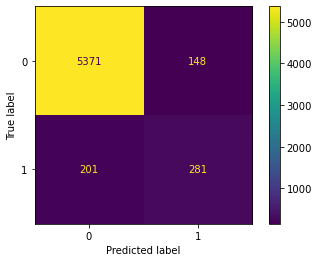

In [154]:
# XGBoost : confusion matrix

metrics.plot_confusion_matrix(xgb_obj, X_test_scaled, y_test)
plt.show()

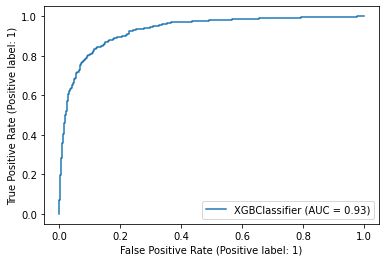

In [155]:
# XGBoost : ROC_AUC

metrics.plot_roc_curve(xgb_obj, X_test_scaled, y_test)
plt.show()

In [156]:
# View the final table contents

perf_df

,Model,Precision,Recall,F1_score,ROC_AUC
0,Logistic Regression,0.091931,0.560166,0.157941,0.575711
0,Decision Tree,0.336904,0.717842,0.458582,0.841837
0,Random Forest,0.586271,0.655602,0.619001,0.924402
0,Gradient Boosting,0.483261,0.688797,0.568007,0.919795
0,XGBoost,0.655012,0.582988,0.616905,0.930164


According to the above table, XGBoost gives us good/positive results.

## Step 5:  Feature importance

In [157]:
# XGBoost

xgb_new = xgb.XGBClassifier(random_state = 40)

In [158]:
# Fit the model

xgb_new.fit(X_train_re_sample, y_train_re_sample)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=40,
              reg_alpha=0, reg_lambda=1, ...)

In [159]:
# Prediction

y_pred = xgb_new.predict(X_test)

In [160]:
# Validate the scores

performance("XGBoost", y_test, y_pred, pred_prob[:,1])

XGBoost:
Precision: 0.6516587677725119
Recall: 0.5705394190871369
F1_score: 0.6084070796460176
ROC_AUC: 0.9301635466765507


,Model,Precision,Recall,F1_score,ROC_AUC
0,XGBoost,0.651659,0.570539,0.608407,0.930164


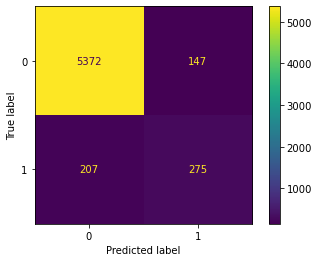

In [161]:
# XGBoost : confusion matrix

metrics.plot_confusion_matrix(xgb_new, X_test, y_test)
plt.show()

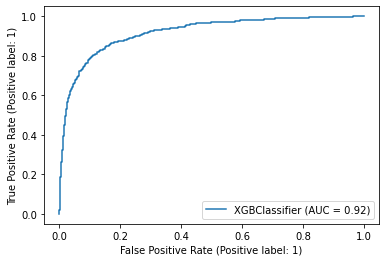

In [162]:
# XGBoost : ROC_AUC

metrics.plot_roc_curve(xgb_new, X_test, y_test) 
plt.show()

In [163]:
# Classification report

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5519
           1       0.65      0.57      0.61       482

    accuracy                           0.94      6001
   macro avg       0.81      0.77      0.79      6001
weighted avg       0.94      0.94      0.94      6001



In [164]:
# Data frame to depict feature importance

feature_importance = pd.DataFrame({"Columns":X_train.columns,"Feature importance":xgb_new.feature_importances_})

In [165]:
# Top 30 important features

final = feature_importance.sort_values(by = "Feature importance", ascending = False).head(30)
final

,Columns,Feature importance
65,loc_ic_mou_8,0.229710
134,fb_user_8,0.199777
14,roam_og_mou_8,0.053592
119,night_pck_user_8,0.048822
80,total_ic_mou_8,0.047569
104,total_rech_data_8,0.018651
117,night_pck_user_6,0.018212
132,fb_user_6,0.014097
95,total_rech_amt_8,0.011499
120,monthly_2g_6,0.010862


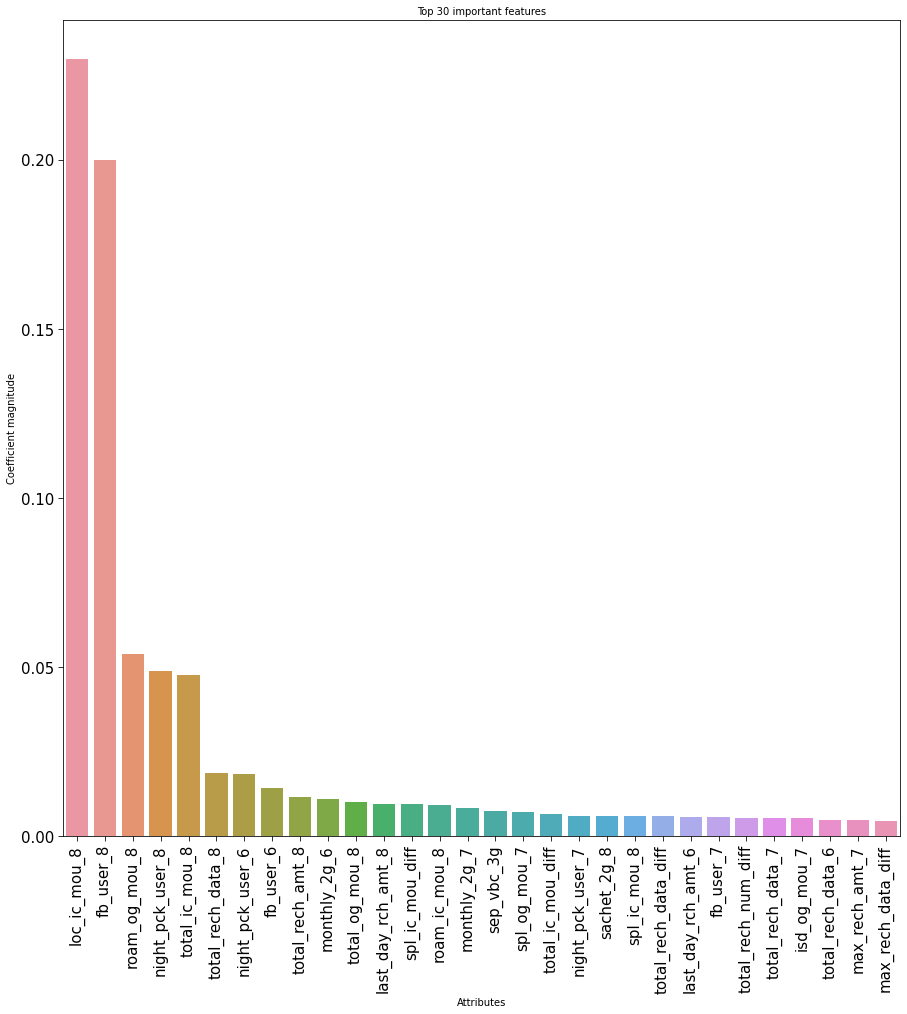

In [166]:
# Bar plot to visualize the important features

plt.figure(figsize = [15,15])
sns.barplot(x = "Columns", y = "Feature importance", data = final)
plt.title("Top 30 important features", size = 10)
plt.xticks(rotation = "vertical")
plt.ylabel("Coefficient magnitude", size = 10)
plt.xlabel("Attributes", size = 10)
plt.tick_params(size = 5, labelsize = 15) 
plt.show()

## Conclusion

* If the average revenue per user is higher, and users who are unhappy with the network are more likely to leave/churn.
* The number of minutes spent on local calls has an effect on churn.
* Churn is also influenced by a large variance in recharge quantity between the 6th (June) and 7th (July) month.
* Users who make more roaming calls in both incoming and outgoing calls are more likely to unsubscribe. The company can concentrate on them too.

**Recommendations**

1. Considering the roam_og_mou_8 variable, customers who have increased their roaming outbound minutes of use are more likely to churn.
2. The network operator(s) must look at their roaming pricing and service quality further.
3. It's possible that their roaming rates are less competitive than their competitors.
4. Increase the service for all facebook, night pack, roaming users in order to save them from churning
5. The company should concentrate on STD and ISD prices. Provide them with STD and ISD bundles packs.
7. It is hoped that the telecom company would collect consumer question & complaints data and tailor their services to their demands.
8. Provide additional internet services on average recharge packs.
9. Customers with increased value-based costs in the action phase are also more likely to churn than other customers. As a result, these clients could be a potential target for an offer.
10. For the month of August, customers with declining STD incoming minutes of usage for operators T to fixed lines of T are more likely to unsubscribe.
11. In the action phase, target clients who have used less minutes of incoming local and outbound ISD calls (mostly in the month of August).
12. Customers with lower outgoing and incoming charges in July and August should be targeted.
13. In August, customers with declining incoming minutes of usage for operators T to fixed lines of T are more likely to churn. Focus is needed here.